# Libraries

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Ignoring Waring 
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# DataPaths

In [2]:
# Required Data Pth
X_train_path = r"C:\Users\emage\OneDrive\Muqesh.py\DS Test\Training\X_train.csv"
y_train_path = r"C:\Users\emage\OneDrive\Muqesh.py\DS Test\Training\y_train.csv"
X_test_path  = r"C:\Users\emage\OneDrive\Muqesh.py\DS Test\Test\X_test.csv"

# Data Loading

In [3]:
# Data Loading 
X_train = pd.read_csv(X_train_path)
y_train = pd.read_csv(y_train_path)

# Printing X_train Data
X_train.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,NaN,2.5,NaN,NaN,2.595,10.0,0,0,2.0,14.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.816,1750.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,22.0,3.7,16.0,12.0,3.795,19.0,4,72,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,17.0,0.88,1.0,40.000,10833.333330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,NaN,2.4,NaN,NaN,2.495,17.0,2,15,7.0,3.0,19.0,NaN,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000,6250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,1.0,3.5,4.0,4.0,3.595,6.0,5,190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,6.0,1.00,0.0,26.000,2413.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,206.0,3.8,11.0,11.0,3.895,31.0,10,1504,0.0,1.0,4.0,0.0,0.0,0.0,0.0,57532.0,0.97,3398.0,31.0,0.96,0.0,44.000,7666.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [4]:
# Printing y_train Data
y_train.head()

,Unique_ID,Dependent_Variable
0,Candidate_5926,1
1,Candidate_48134,0
2,Candidate_51717,1
3,Candidate_26401,0
4,Candidate_34872,0


# Data Inspections

In [5]:
# Shape of the X_train
print("Columns : ", X_train.shape[0], "\nRows    : ", X_train.shape[1])

Columns :  33050 
Rows    :  44


In [6]:
# Statistical Descriptions of numerical Columns
X_train.describe()

,C1,C2,C3,C4,C5,C7,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
count,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.00000,28438.000000,32685.000000,28444.000000,28444.000000,32685.000000,32623.000000,33050.000000,33050.000000,32623.000000,32623.000000,32334.000000,28436.000000,32442.000000,32623.000000,28444.000000,2.844400e+04,28444.000000,28479.000000,28479.000000,28479.000000,28479.000000,30564.000000,33050.000000,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6220.000000,33050.000000,33050.000000,32623.000000
mean,1.119818,2.403873,12.856097,14.437398,1.719395,3.124932,19.97653,81.342710,3.359361,9.574075,8.350127,3.454361,25.229930,6.082723,325.585870,0.903381,2.044049,7.108678,1016.018568,4.537760,0.330135,0.023203,1.582073e+04,0.528907,11037.365322,21.764142,0.857199,0.906422,58.433363,5050.306727,1.338224,20.084197,19.512199,0.526391,0.045288,7192.813526,2379.621620,0.744373,125.629394,224.313536,19.587254
std,0.399382,3.399024,12.013457,15.527474,1.320860,2.158905,8.11087,85.397795,0.411040,5.584756,4.999040,0.411040,14.274854,4.535870,452.149358,2.635207,3.172081,8.304500,6739.984010,10.610457,0.799125,0.175363,3.405137e+04,0.350046,22052.222523,12.438568,0.173017,1.227818,150.660621,6237.726330,0.680982,16.045120,15.637882,2.144069,0.443838,6460.139952,3379.065104,50.764684,104.391919,186.513844,7.352667
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.095000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,-194.000000,20.000000,0.000000,2.000000
25%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,13.45000,21.000000,3.200000,6.000000,5.000000,3.295000,15.000000,3.000000,60.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.647000e+03,0.210000,523.000000,13.000000,0.770000,0.000000,26.000000,2833.333333,1.000000,9.000000,9.000000,0.000000,0.000000,3000.000000,0.000000,-31.000000,54.000000,98.740000,14.000000
50%,1.000000,1.000000,10.000000,10.000000,2.000000,4.000000,19.27500,53.000000,3.400000,9.000000,8.000000,3.495000,23.000000,5.000000,183.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,6.073000e+03,0.560000,3352.000000,20.000000,0.920000,1.000000,40.000000,4166.666667,1.000000,15.000000,14.000000,0.000000,0.000000,5000.000000,1108.440000,0.000000,90.000000,172.600000,19.000000
75%,1.000000,3.000000,20.000000,26.000000,2.000000,4.000000,26.90000,112.000000,3.600000,13.000000,11.000000,3.695000,33.000000,8.000000,420.000000,1.000000,3.000000,9.000000,0.000000,4.000000,0.000000,0.000000,1.627725e+04,0.840000,12285.000000,29.000000,1.000000,1.000000,60.000000,6250.000000,1.500000,28.000000,27.000000,0.000000,0.000000,9500.000000,3408.750000,32.000000,160.000000,300.947500,24.000000
max,3.000000,20.000000,51.000000,67.000000,7.000000,7.000000,48.00000,755.000000,4.400000,59.000000,51.000000,4.495000,129.000000,51.000000,14985.000000,83.000000,105.000000,379.000000,444745.000000,99.000000,30.000000,7.000000,1.435667e+06,5.830000,646285.000000,114.000000,1.000000,20.000000,2002.000000,618547.833300,7.000000,120.000000,111.000000,42.000000,11.000000,60001.000000,22586.670000,257.000000,700.000000,2153.380000,64.000000


1. <font color='red'>
    There is huge gap between 75% and the Max, 
   </font>
1. <font color='red'>
    It show a outliers present in the data.  
   </font>


In [7]:
# Brief introduction
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Unique_ID  33050 non-null  object 
 1   C1         33050 non-null  int64  
 2   C2         33050 non-null  int64  
 3   C3         33050 non-null  int64  
 4   C4         33050 non-null  int64  
 5   C5         33050 non-null  int64  
 6   C6         33050 non-null  bool   
 7   C7         33050 non-null  int64  
 8   C8         33050 non-null  bool   
 9   N1         33050 non-null  float64
 10  N2         28438 non-null  float64
 11  N3         32685 non-null  float64
 12  N4         28444 non-null  float64
 13  N5         28444 non-null  float64
 14  N6         32685 non-null  float64
 15  N7         32623 non-null  float64
 16  N8         33050 non-null  int64  
 17  N9         33050 non-null  int64  
 18  N10        32623 non-null  float64
 19  N10.1      32623 non-null  float64
 20  N11   

1. <font color='red'>
    We have total 44 columns in which 2 are Bool, 33 are float64, 8 are int64 and 1 is object dtype column.
   </font>
1. <font color='red'>
    Total 33050 ercords we have.  
   </font>
1. <font color='red'>
    Many of them contains null values.
   </font>
1. <font color='red'>
    Data-type of each column matching with the X_train data. that means columns are "homogeneous column" or "uniform column".
   </font>

# Data Preprocessing

#### Merging X_train and y_train on "Unique_ID"

In [8]:
# Merging on Unique_ID to avoid shuffling of records.
df = pd.merge(X_train, y_train, on="Unique_ID")
df.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35,Dependent_Variable
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,NaN,2.5,NaN,NaN,2.595,10.0,0,0,2.0,14.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.816,1750.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0,1
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,22.0,3.7,16.0,12.0,3.795,19.0,4,72,0.0,5.0,9.0,0.0,0.0,0.0,0.0,1944.0,0.06,25856.0,17.0,0.88,1.0,40.000,10833.333330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0,0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,NaN,2.4,NaN,NaN,2.495,17.0,2,15,7.0,3.0,19.0,NaN,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000,6250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0,1
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,1.0,3.5,4.0,4.0,3.595,6.0,5,190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8244.0,0.89,1006.0,6.0,1.00,0.0,26.000,2413.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0,0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,206.0,3.8,11.0,11.0,3.895,31.0,10,1504,0.0,1.0,4.0,0.0,0.0,0.0,0.0,57532.0,0.97,3398.0,31.0,0.96,0.0,44.000,7666.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0,0


#### Inspection of new merged data

In [9]:
# Shape of the X_train
print("Columns : ", df.shape[0], "\nRows    : ", df.shape[1])

Columns :  33050 
Rows    :  45


In [10]:
# Brief into of new column
df['Dependent_Variable'].info()

<class 'pandas.core.series.Series'>
Int64Index: 33050 entries, 0 to 33049
Series name: Dependent_Variable
Non-Null Count  Dtype
--------------  -----
33050 non-null  int64
dtypes: int64(1)
memory usage: 516.4 KB


In [11]:
# Value_counts
df['Dependent_Variable'].value_counts()

0    22844
1    10206
Name: Dependent_Variable, dtype: int64

1. <font color='red'>
    Target variable are of int type. 
   </font>
1. <font color='red'>
    It contains binary value (0 or 1)
   </font>


## 1. Null Value Treatment 

In [12]:
# Columns containing Nulls
df.isnull().sum()[df.isnull().sum()>0]

N2        4612
N3         365
N4        4606
N5        4606
N6         365
N7         427
N10        427
N10.1      427
N11        716
N12       4614
N14        608
N15        427
N16       4606
N17       4606
N18       4606
N19       4571
N20       4571
N21       4571
N22       4571
N23       2486
N25      26779
N26      26779
N27      26779
N28      26779
N29      26779
N30      26779
N31      26779
N32      26830
N35        427
dtype: int64

In [13]:
# % nulls 
((df.isnull().sum() / len(df)) * 100)[((df.isnull().sum() / len(df))*100)> 0]

N2       13.954614
N3        1.104387
N4       13.936460
N5       13.936460
N6        1.104387
N7        1.291982
N10       1.291982
N10.1     1.291982
N11       2.166415
N12      13.960666
N14       1.839637
N15       1.291982
N16      13.936460
N17      13.936460
N18      13.936460
N19      13.830560
N20      13.830560
N21      13.830560
N22      13.830560
N23       7.521936
N25      81.025719
N26      81.025719
N27      81.025719
N28      81.025719
N29      81.025719
N30      81.025719
N31      81.025719
N32      81.180030
N35       1.291982
dtype: float64

In [14]:
# Columns name containg more than 80% null
list(((df.isnull().sum() / len(df)) * 100)[((df.isnull().sum() / len(df))*100)> 80].index)

['N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32']

#### Analyse and treat them

1. <font color='red'>
    To avoid Biaseness will be created after Filling nulls, Better to drop them.
   </font>
1. <font color='red'>
    If we don't get prominant accuracy. we can come here again and proceed with it. 
   </font>


In [15]:
# Droping those columns containing Null more than 80%

# Get the column names where null percentage is greater than the 80
columns_to_drop = list(((df.isnull().sum() / len(df)) * 100)[((df.isnull().sum() / len(df))*100)> 80].index)

# Drop the columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

In [16]:
# Recheking the % NUll 
((df.isnull().sum() / len(df)) * 100)[((df.isnull().sum() / len(df))*100)> 0].index

Index(['N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N10', 'N10.1', 'N11', 'N12', 'N14',
       'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N35'],
      dtype='object')

### Treating them one by one

#### 1. Ploting Histogram for all of them

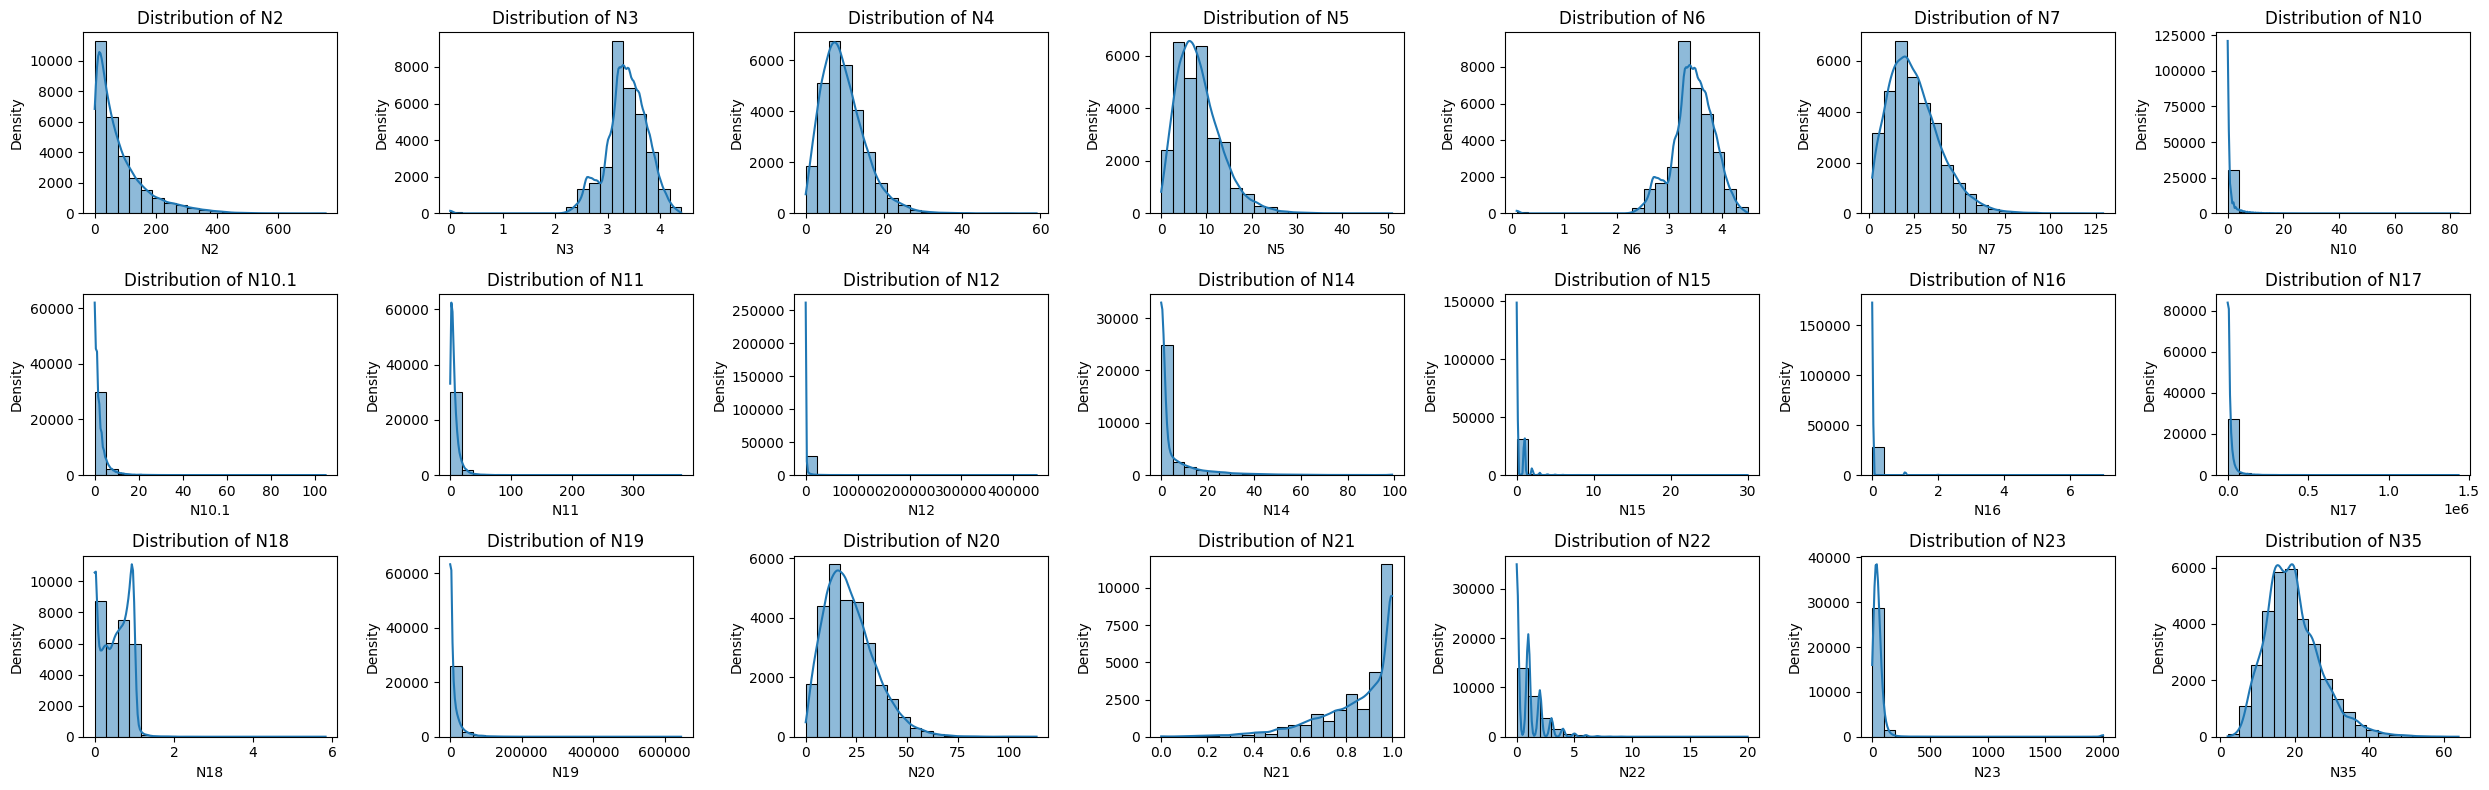

In [17]:
# list of columns
columns_to_plot = ['N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N10', 'N10.1', 'N11', 'N12', 'N14',
                   'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N35']

# Create subplots for multiple plots with 3 rows and 7 columns
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(25, 8))


# Loop through each column and create a distribution plot
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove any empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### Filling them with mean values

In [18]:
# Fill null values with the mean of each column
columns = ['N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N10', 'N10.1', 'N11', 'N12', 'N14',
                   'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N35']

for col in columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [19]:
# Rechecking % nulls 
((df.isnull().sum() / len(df)) * 100)[((df.isnull().sum() / len(df))*100)> 0]

Series([], dtype: float64)

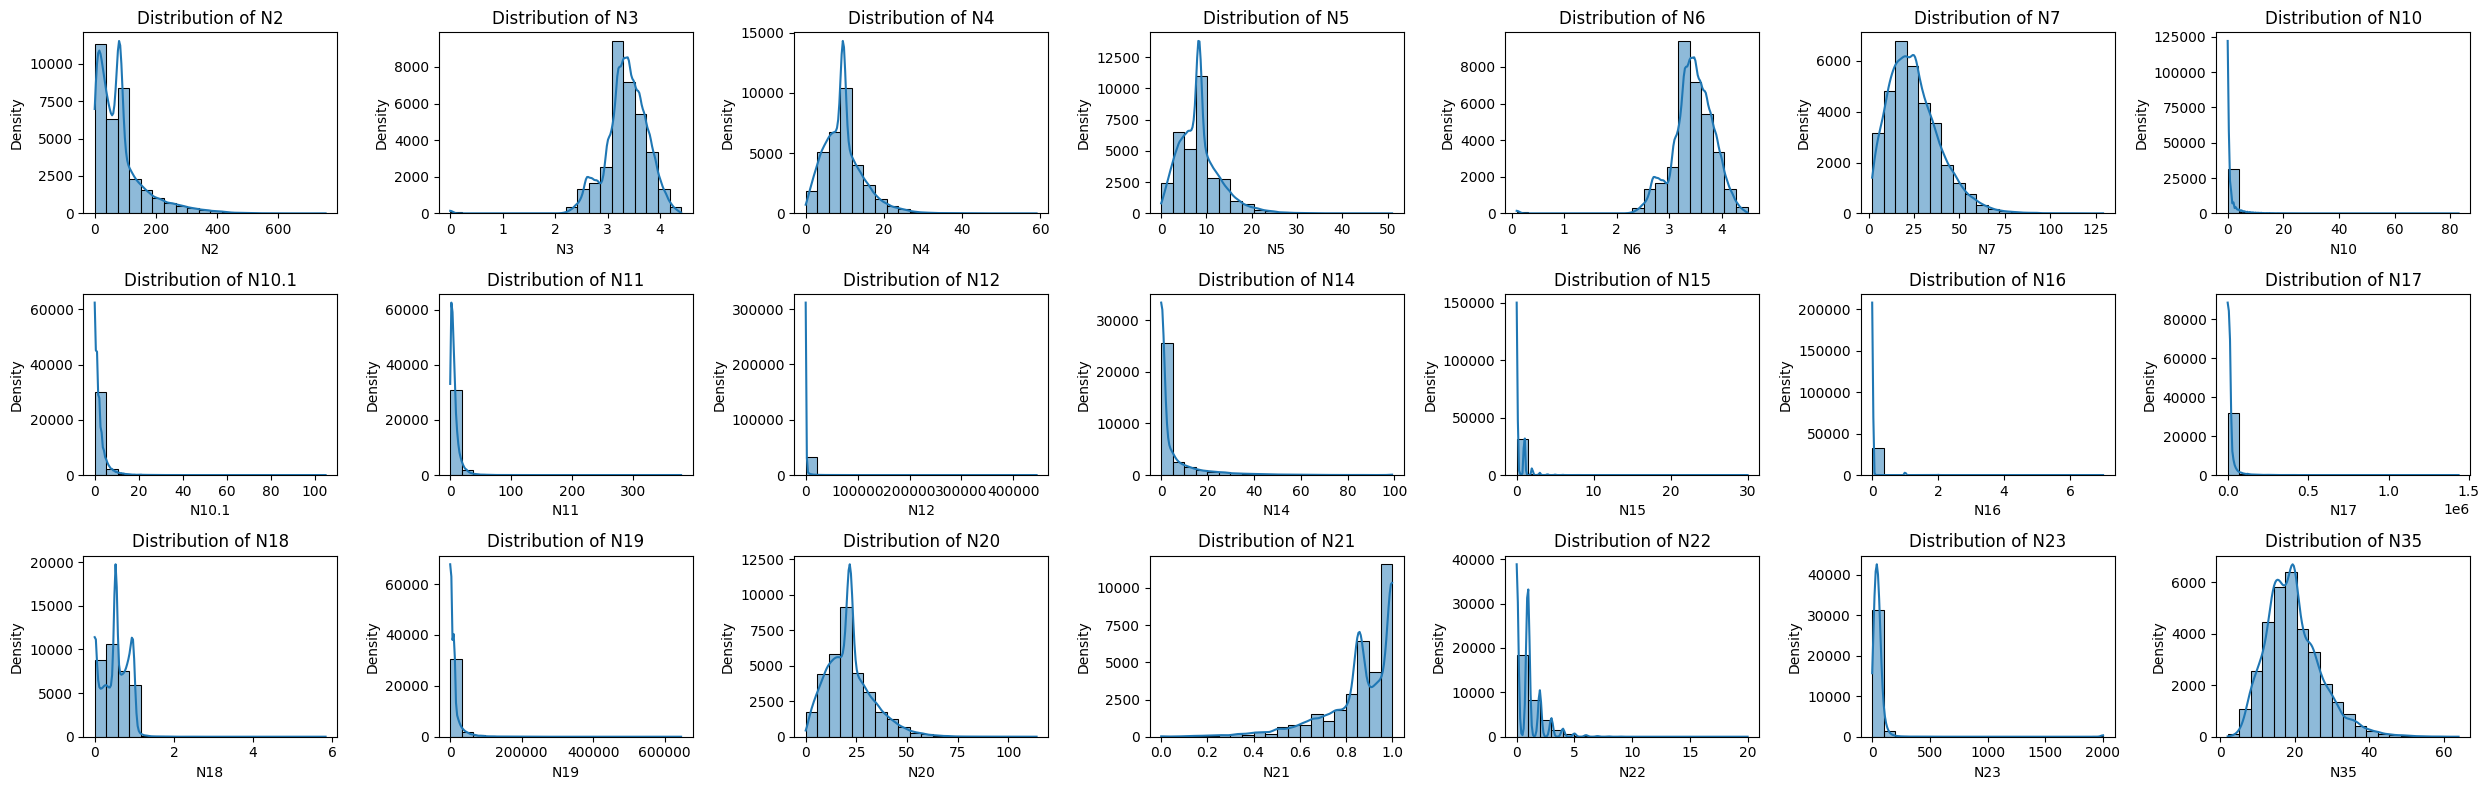

In [20]:
# Evaluating the fillna output using distplot
# list of columns
columns_to_plot = ['N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N10', 'N10.1', 'N11', 'N12', 'N14',
                   'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N35']

# Create subplots for multiple plots with 3 rows and 7 columns
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(25, 8))


# Loop through each column and create a distribution plot
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove any empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## 2. Outlier Treatment

In [21]:
# Selecting Numerical Columns
print(list(df.describe().columns))

['C1', 'C2', 'C3', 'C4', 'C5', 'C7', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24', 'N33', 'N34', 'N35', 'Dependent_Variable']


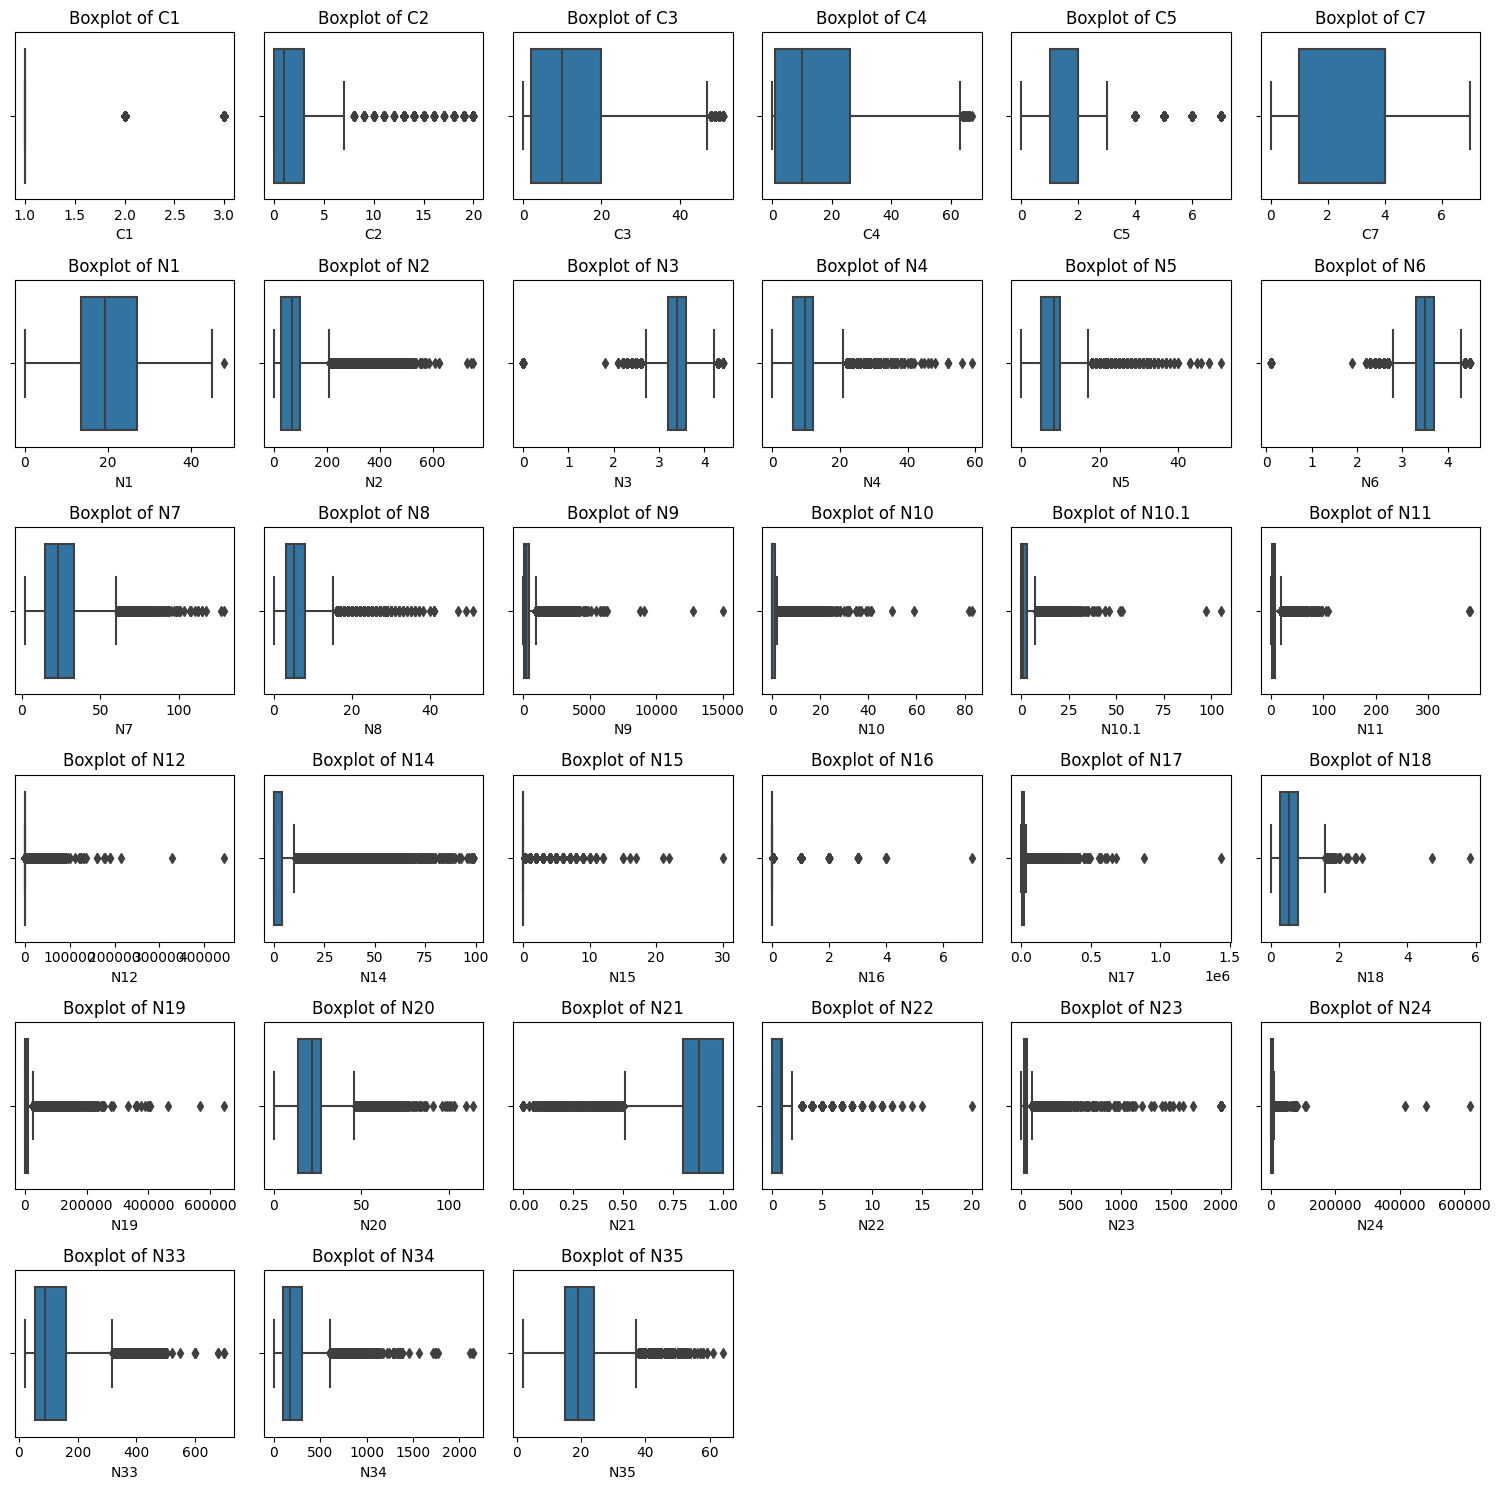

In [22]:
# list of columns
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C7', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6',
                   'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12', 'N14', 'N15', 'N16',
                   'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24', 'N33', 'N34',
                   'N35']

# Create subplots for multiple boxplots with 6 rows and 6 columns
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15, 15))

# Flatten the axes array to loop through it
axes = axes.flatten()

# Loop through each column and create a boxplot for each subplot in the grid
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df[column], ax=axes[i], orient="h")
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('')

# Remove any empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

1. <font color='red'>
    Let's keep the data unchanged i.e no outlier treatment.
   </font>
1. <font color='red'>
    If we don't get prominant accuracy. we can come here again and proceed with it. 
   </font>


## 3. Data Labeling

In [23]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = df.drop('Unique_ID', axis=1).select_dtypes('bool')
categorical_columns.head()

,C6,C8
0,False,True
1,False,True
2,False,True
3,False,True
4,True,True


In [24]:
labeled_df = df.drop('Unique_ID', axis=1).copy()
# Apply label encoding to categorical columns
for column in categorical_columns:
    labeled_df[column] = label_encoder.fit_transform(labeled_df[column])
labeled_df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35,Dependent_Variable
0,1,0,11,31,0,0,0,1,23.75,81.34271,2.5,9.574075,8.350127,2.595,10.0,0,0,2.0,14.0,7.108678,1016.018568,4.53776,0.0,0.023203,15820.726797,0.528907,11037.365322,21.764142,0.857199,0.906422,27.816,1750.000000,58.0,113.39,12.0,1
1,1,4,2,66,2,0,1,1,11.05,22.00000,3.7,16.000000,12.000000,3.795,19.0,4,72,0.0,5.0,9.000000,0.000000,0.00000,0.0,0.000000,1944.000000,0.060000,25856.000000,17.000000,0.880000,1.000000,40.000,10833.333330,160.0,262.10,17.0,0
2,1,0,19,2,0,0,0,1,29.00,81.34271,2.4,9.574075,8.350127,2.495,17.0,2,15,7.0,3.0,19.000000,1016.018568,10.00000,1.0,0.023203,15820.726797,0.528907,11037.365322,21.764142,0.857199,0.906422,20.000,6250.000000,24.0,50.29,18.0,1
3,1,1,16,47,1,0,4,1,17.99,1.00000,3.5,4.000000,4.000000,3.595,6.0,5,190,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,8244.000000,0.890000,1006.000000,6.000000,1.000000,0.000000,26.000,2413.666667,70.0,126.52,27.0,0
4,1,1,13,1,1,1,6,1,27.50,206.00000,3.8,11.000000,11.000000,3.895,31.0,10,1504,0.0,1.0,4.000000,0.000000,0.00000,0.0,0.000000,57532.000000,0.970000,3398.000000,31.000000,0.960000,0.000000,44.000,7666.666667,100.0,205.47,21.0,0


## 4. Scalling the Data

In [25]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Exclude the 'Employee ID' column from scaling
scaled_data = scaler.fit_transform(labeled_df.drop('Dependent_Variable', axis=1))

# Create a new DataFrame with the scaled data and the 'Employee ID' column
scaled_df = pd.DataFrame(scaled_data, columns=labeled_df.drop('Dependent_Variable', axis=1).columns)
scaled_df['Dependent_Variable'] = labeled_df['Dependent_Variable']
scaled_df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35,Dependent_Variable
0,0.0,0.00,0.215686,0.462687,0.000000,0.0,0.000000,1.0,0.494792,0.107739,0.568182,0.162272,0.163728,0.568182,0.062992,0.000000,0.000000,0.024096,0.133333,0.018756,0.002284,0.045836,0.000000,0.003315,0.011020,0.090722,0.017078,0.190914,0.857199,0.045321,0.013894,0.002829,0.055882,0.052657,0.161290,1
1,0.0,0.20,0.039216,0.985075,0.285714,0.0,0.142857,1.0,0.230208,0.029139,0.840909,0.271186,0.235294,0.840909,0.133858,0.078431,0.004805,0.000000,0.047619,0.023747,0.000000,0.000000,0.000000,0.000000,0.001354,0.010292,0.040007,0.149123,0.880000,0.050000,0.019980,0.017514,0.205882,0.121716,0.241935,0
2,0.0,0.00,0.372549,0.029851,0.000000,0.0,0.000000,1.0,0.604167,0.107739,0.545455,0.162272,0.163728,0.545455,0.118110,0.039216,0.001001,0.084337,0.028571,0.050132,0.002284,0.101010,0.033333,0.003315,0.011020,0.090722,0.017078,0.190914,0.857199,0.045321,0.009990,0.010104,0.005882,0.023354,0.258065,1
3,0.0,0.05,0.313725,0.701493,0.142857,0.0,0.571429,1.0,0.374792,0.001325,0.795455,0.067797,0.078431,0.795455,0.031496,0.098039,0.012679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005742,0.152659,0.001557,0.052632,1.000000,0.000000,0.012987,0.003902,0.073529,0.058754,0.403226,0
4,0.0,0.05,0.254902,0.014925,0.142857,1.0,0.857143,1.0,0.572917,0.272848,0.863636,0.186441,0.215686,0.863636,0.228346,0.196078,0.100367,0.000000,0.009524,0.010554,0.000000,0.000000,0.000000,0.000000,0.040073,0.166381,0.005258,0.271930,0.960000,0.000000,0.021978,0.012395,0.117647,0.095417,0.306452,0


# Modelling

## Train Test Split

In [26]:
# Assuming df is your DataFrame
X = scaled_df.drop(columns=['Dependent_Variable'])  # Exclude Unique_ID
y = scaled_df['Dependent_Variable']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
9254,1.0,0.35,0.196078,0.194030,0.142857,0.0,0.142857,1.0,0.403333,0.018543,0.750000,0.101695,0.098039,0.750000,0.157480,0.078431,0.063864,0.000000,0.000000,0.000000,0.000000,0.020202,0.000000,0.0,0.032068,0.169811,0.000723,0.184211,0.85,0.00,0.026973,0.013472,0.088235,0.170759,0.451613
7822,0.0,0.00,0.450980,0.014925,0.285714,1.0,0.285714,1.0,0.458333,0.144371,0.659091,0.084746,0.078431,0.659091,0.212598,0.019608,0.001001,0.012048,0.000000,0.007916,0.000022,0.111111,0.066667,0.0,0.000125,0.000000,0.000000,0.114035,0.33,0.05,0.012987,0.008757,0.058824,0.053205,0.225806
11604,0.0,0.00,0.039216,0.089552,0.285714,0.0,0.285714,1.0,0.194792,0.009272,0.818182,0.067797,0.078431,0.818182,0.023622,0.078431,0.002669,0.000000,0.000000,0.002639,0.000000,0.000000,0.000000,0.0,0.001562,0.036021,0.012623,0.043860,0.80,0.00,0.006993,0.006938,0.205882,0.118744,0.177419
3099,0.0,0.05,0.274510,0.014925,0.285714,1.0,0.285714,1.0,0.165625,0.115232,0.909091,0.203390,0.215686,0.909091,0.259843,0.156863,0.016283,0.000000,0.000000,0.015831,0.000000,0.000000,0.000000,0.0,0.003383,0.024014,0.043701,0.307018,0.97,0.00,0.019980,0.007922,0.102941,0.065437,0.274194
21525,0.0,0.05,0.019608,0.014925,0.142857,0.0,0.142857,1.0,0.166458,0.003974,0.840909,0.220339,0.235294,0.840909,0.196850,0.254902,0.034301,0.000000,0.019048,0.010554,0.000000,0.000000,0.000000,0.0,0.017161,0.034305,0.151073,0.236842,0.96,0.05,0.008991,0.014874,0.147059,0.087300,0.225806


## 1. Random Forest Classifier  

In [27]:
# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score for Random Forest Classifier
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"AUC-ROC Score for Random Forest Classifier: {roc_auc_rf:.2f}")

AUC-ROC Score for Random Forest Classifier: 0.75


### Result Table

In [28]:
# Create a dataframe containing the measures
result = pd.DataFrame({'Method': ['Random Forest Classifier'],
                        'AUC-ROC Score' : [roc_auc_rf]})
result

,Method,AUC-ROC Score
0,Random Forest Classifier,0.754004


## 2. Random Forest Classifier with Hyperparameter Tuning

In [29]:
# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters and their ranges for tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, 
                               scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the model to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_

# Print the best parameters
print("Best Hyperparameters for Random Forest Classifier:")
print(best_params_rf)

# Calculate ROC AUC score for the best estimator on the test set
y_pred_rf = best_estimator_rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"AUC-ROC Score for Random Forest Classifier: {roc_auc_rf:.2f}")

Best Hyperparameters for Random Forest Classifier:
{'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
AUC-ROC Score for Random Forest Classifier: 0.76


### Result Table

In [30]:
# Create a dataframe containing the measures
temp_result = pd.DataFrame({'Method': ['Random Forest Classifier(Hyperparameter Tuning)'],
                        'AUC-ROC Score' : [roc_auc_rf]})

result = pd.concat([result, temp_result])
result

,Method,AUC-ROC Score
0,Random Forest Classifier,0.754004
0,Random Forest Classifier(Hyperparameter Tuning),0.761850


## 3. Gradient Boosting Classifier without Hyperparameter Tuning

In [31]:
# Define the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_gb = gb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score for Gradient Boosting Classifier
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
print(f"AUC-ROC Score for Gradient Boosting Classifier: {roc_auc_gb:.2f}")


AUC-ROC Score for Gradient Boosting Classifier: 0.76


### Result Table

In [32]:
# Create a dataframe containing the measures
temp_result = pd.DataFrame({'Method': ['Gradient Boosting Classifier'],
                        'AUC-ROC Score' : [roc_auc_gb]})

result = pd.concat([result, temp_result])
result

,Method,AUC-ROC Score
0,Random Forest Classifier,0.754004
0,Random Forest Classifier(Hyperparameter Tuning),0.761850
0,Gradient Boosting Classifier,0.762126


## 4. Gradient Boosting Classifier with Hyperparameter Tuning

In [33]:
# Define the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define hyperparameters and their ranges for tuning
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb_classifier, param_grid=param_grid_gb, 
                               scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the model to the data
grid_search_gb.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_gb = grid_search_gb.best_params_
best_estimator_gb = grid_search_gb.best_estimator_

# Print the best parameters
print("Best Hyperparameters for Gradient Boosting Classifier:")
print(best_params_gb)

# Calculate ROC AUC score for the best estimator on the test set
y_pred_gb = best_estimator_gb.predict_proba(X_test)[:, 1]
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
print(f"AUC-ROC Score for Gradient Boosting Classifier: {roc_auc_gb:.2f}")

Best Hyperparameters for Gradient Boosting Classifier:
{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
AUC-ROC Score for Gradient Boosting Classifier: 0.77


### Result Table

In [34]:
# Create a dataframe containing the measures
temp_result = pd.DataFrame({'Method': ['Gradient Boosting Classifier(Hyperparameter Tuning)'],
                        'AUC-ROC Score' : [roc_auc_gb]})

result = pd.concat([result, temp_result])
result

,Method,AUC-ROC Score
0,Random Forest Classifier,0.754004
0,Random Forest Classifier(Hyperparameter Tuning),0.761850
0,Gradient Boosting Classifier,0.762126
0,Gradient Boosting Classifier(Hyperparameter Tu...,0.767128


## 5. LogisticRegression

In [35]:

# Define the LogisticRegression model
logistic_regression = LogisticRegression(random_state=42)

# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_lr = logistic_regression.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score for Logistic Regression
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print(f"AUC-ROC Score for Logistic Regression: {roc_auc_lr:.2f}")

AUC-ROC Score for Logistic Regression: 0.73


### Result Table

In [36]:
# Create a dataframe containing the measures
temp_result = pd.DataFrame({'Method': ['LogisticRegression'],
                        'AUC-ROC Score' : [roc_auc_lr]})

result = pd.concat([result, temp_result])
result

,Method,AUC-ROC Score
0,Random Forest Classifier,0.754004
0,Random Forest Classifier(Hyperparameter Tuning),0.761850
0,Gradient Boosting Classifier,0.762126
0,Gradient Boosting Classifier(Hyperparameter Tu...,0.767128
0,LogisticRegression,0.731714


## 6. LogisticRegression with HyperParamater Tuning 

In [37]:
# Define the LogisticRegression model
logistic_regression = LogisticRegression(random_state=42)

# Define hyperparameters and their ranges for tuning
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty (L1 or L2)
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithm
}

# Create a GridSearchCV object
grid_search_lr = GridSearchCV(estimator=logistic_regression, param_grid=param_grid_lr,
                               scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the model to the training data with hyperparameter tuning
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_lr = grid_search_lr.best_params_
best_estimator_lr = grid_search_lr.best_estimator_

# Print the best parameters
print("Best Hyperparameters for Logistic Regression:")
print(best_params_lr)

# Calculate ROC AUC score for the best estimator on the test set
y_pred_lr = best_estimator_lr.predict_proba(X_test)[:, 1]
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print(f"AUC-ROC Score for Logistic Regression: {roc_auc_lr:.2f}")

Best Hyperparameters for Logistic Regression:
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
AUC-ROC Score for Logistic Regression: 0.74


### Result Table

In [38]:
# Create a dataframe containing the measures
temp_result = pd.DataFrame({'Method': ['LogisticRegression(HyperParamater Tuning)'],
                        'AUC-ROC Score' : [roc_auc_lr]})

result = pd.concat([result, temp_result])
result

,Method,AUC-ROC Score
0,Random Forest Classifier,0.754004
0,Random Forest Classifier(Hyperparameter Tuning),0.761850
0,Gradient Boosting Classifier,0.762126
0,Gradient Boosting Classifier(Hyperparameter Tu...,0.767128
0,LogisticRegression,0.731714
0,LogisticRegression(HyperParamater Tuning),0.735274


## 7. SVC

In [39]:
# Define the Support Vector Classifier (SVC) model without tuning
svc_classifier = SVC(probability=True, random_state=42)

# Fit the model to the training data
svc_classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_svc = svc_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score for SVC without tuning
roc_auc_svc = roc_auc_score(y_test, y_pred_svc)
print(f"AUC-ROC Score for SVC (without tuning): {roc_auc_svc:.2f}")


AUC-ROC Score for SVC (without tuning): 0.73


### Result Table

In [40]:
# Create a dataframe containing the measures
temp_result = pd.DataFrame({'Method': ['SVC'],
                        'AUC-ROC Score' : [roc_auc_svc]})

result = pd.concat([result, temp_result])
result

,Method,AUC-ROC Score
0,Random Forest Classifier,0.754004
0,Random Forest Classifier(Hyperparameter Tuning),0.761850
0,Gradient Boosting Classifier,0.762126
0,Gradient Boosting Classifier(Hyperparameter Tu...,0.767128
0,LogisticRegression,0.731714
0,LogisticRegression(HyperParamater Tuning),0.735274
0,SVC,0.729121


## 8. SVC (Hyperparameter Tuning)

In [41]:
# Define the Support Vector Classifier (SVC) model
svc_classifier = SVC(probability=True, random_state=42)

# Define hyperparameters and their ranges for tuning
param_grid_svc = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type
    'gamma': ['scale', 'auto'],     # Kernel coefficient (scale or auto)
}

# Create a GridSearchCV object
grid_search_svc = GridSearchCV(estimator=svc_classifier, param_grid=param_grid_svc,
                               scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the model to the training data with hyperparameter tuning
grid_search_svc.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_svc = grid_search_svc.best_params_
best_estimator_svc = grid_search_svc.best_estimator_

# Print the best parameters
print("Best Hyperparameters for SVC:")
print(best_params_svc)

# Calculate ROC AUC score for the best estimator on the test set
y_pred_svc = best_estimator_svc.predict_proba(X_test)[:, 1]
roc_auc_svc = roc_auc_score(y_test, y_pred_svc)
print(f"AUC-ROC Score for SVC (with tuning): {roc_auc_svc:.2f}")

Best Hyperparameters for SVC:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
AUC-ROC Score for SVC (with tuning): 0.74


### Result Table

In [42]:
# Create a dataframe containing the measures
temp_result = pd.DataFrame({'Method': ['SVC(Hyperparameter Tuning)'],
                        'AUC-ROC Score' : [roc_auc_svc]})

result = pd.concat([result, temp_result])
result

,Method,AUC-ROC Score
0,Random Forest Classifier,0.754004
0,Random Forest Classifier(Hyperparameter Tuning),0.761850
0,Gradient Boosting Classifier,0.762126
0,Gradient Boosting Classifier(Hyperparameter Tu...,0.767128
0,LogisticRegression,0.731714
0,LogisticRegression(HyperParamater Tuning),0.735274
0,SVC,0.729121
0,SVC(Hyperparameter Tuning),0.737885


## 9. KNeighborsClassifier

In [43]:
# Define the KNeighborsClassifier model without tuning
knn_classifier = KNeighborsClassifier()

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_knn = knn_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score for KNeighborsClassifier without tuning
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
print(f"AUC-ROC Score for KNeighborsClassifier (without tuning): {roc_auc_knn:.2f}")

AUC-ROC Score for KNeighborsClassifier (without tuning): 0.67


### Result Table

In [44]:
# Create a dataframe containing the measures
temp_result = pd.DataFrame({'Method': ['KNeighborsClassifier'],
                        'AUC-ROC Score' : [roc_auc_knn]})

result = pd.concat([result, temp_result])
result

,Method,AUC-ROC Score
0,Random Forest Classifier,0.754004
0,Random Forest Classifier(Hyperparameter Tuning),0.761850
0,Gradient Boosting Classifier,0.762126
0,Gradient Boosting Classifier(Hyperparameter Tu...,0.767128
0,LogisticRegression,0.731714
0,LogisticRegression(HyperParamater Tuning),0.735274
0,SVC,0.729121
0,SVC(Hyperparameter Tuning),0.737885
0,KNeighborsClassifier,0.667049


## 10. KNeighborsClassifier with Hyperparameter Tuning

In [45]:
# Define the KNeighborsClassifier model
knn_classifier = KNeighborsClassifier()

# Define hyperparameters and their ranges for tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function for prediction
    'p': [1, 2]  # Power parameter for Minkowski distance
}

# Create a GridSearchCV object
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn,
                               scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the model to the training data with hyperparameter tuning
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_knn = grid_search_knn.best_params_
best_estimator_knn = grid_search_knn.best_estimator_

# Print the best parameters
print("Best Hyperparameters for KNeighborsClassifier:")
print(best_params_knn)

# Calculate ROC AUC score for the best estimator on the test set
y_pred_knn = best_estimator_knn.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
print(f"AUC-ROC Score for KNeighborsClassifier (with tuning): {roc_auc_knn:.2f}")

Best Hyperparameters for KNeighborsClassifier:
{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
AUC-ROC Score for KNeighborsClassifier (with tuning): 0.70


### Result Table

In [46]:
# Create a dataframe containing the measures
temp_result = pd.DataFrame({'Method': ['KNeighborsClassifier (Hyperparameter Tuning)'],
                        'AUC-ROC Score' : [roc_auc_knn]})

result = pd.concat([result, temp_result])
result

,Method,AUC-ROC Score
0,Random Forest Classifier,0.754004
0,Random Forest Classifier(Hyperparameter Tuning),0.761850
0,Gradient Boosting Classifier,0.762126
0,Gradient Boosting Classifier(Hyperparameter Tu...,0.767128
0,LogisticRegression,0.731714
0,LogisticRegression(HyperParamater Tuning),0.735274
0,SVC,0.729121
0,SVC(Hyperparameter Tuning),0.737885
0,KNeighborsClassifier,0.667049
0,KNeighborsClassifier (Hyperparameter Tuning),0.701580


## 11. XGBoost

In [47]:

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost hyperparameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

num_round = 100  # Number of boosting rounds (trees)

# Train the XGBoost model
model = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred_prob = model.predict(dtest)

# Threshold the predicted probabilities to get binary predictions
threshold = 0.5  # You can adjust this threshold as needed
y_pred = (y_pred_prob > threshold).astype(int)

# Evaluate the model's performance
auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'AUC-ROC: {auc:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

AUC-ROC: 0.76
Accuracy: 0.74
Precision: 0.65
Recall: 0.33
F1-score: 0.44


### Result Table

In [48]:
# Create a dataframe containing the measures
temp_result = pd.DataFrame({'Method': ['XGBoost'],
                        'AUC-ROC Score' : [auc]})

result = pd.concat([result, temp_result])
result

,Method,AUC-ROC Score
0,Random Forest Classifier,0.754004
0,Random Forest Classifier(Hyperparameter Tuning),0.761850
0,Gradient Boosting Classifier,0.762126
0,Gradient Boosting Classifier(Hyperparameter Tu...,0.767128
0,LogisticRegression,0.731714
0,LogisticRegression(HyperParamater Tuning),0.735274
0,SVC,0.729121
0,SVC(Hyperparameter Tuning),0.737885
0,KNeighborsClassifier,0.667049
0,KNeighborsClassifier (Hyperparameter Tuning),0.701580


## 12. XGBoost with Hyperparameter tuning

In [49]:
# Load and preprocess your data if you haven't already
# X, y = ...

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define the hyperparameters and their search ranges
param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'eta': [0.01, 0.1, 0.2],
}

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc')

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Train the final XGBoost model with the best hyperparameters
final_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', **best_params)
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_prob = final_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score on the test set
auc = roc_auc_score(y_test, y_pred_prob)
print(f'Best AUC-ROC Score: {auc:.2f}')


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best AUC-ROC Score: 0.77


### Result Table

In [50]:
# Create a dataframe containing the measures
temp_result = pd.DataFrame({'Method': ['XGBoost(Hyperparameter tuning)'],
                        'AUC-ROC Score' : [auc]})

result = pd.concat([result, temp_result])
result

,Method,AUC-ROC Score
0,Random Forest Classifier,0.754004
0,Random Forest Classifier(Hyperparameter Tuning),0.761850
0,Gradient Boosting Classifier,0.762126
0,Gradient Boosting Classifier(Hyperparameter Tu...,0.767128
0,LogisticRegression,0.731714
0,LogisticRegression(HyperParamater Tuning),0.735274
0,SVC,0.729121
0,SVC(Hyperparameter Tuning),0.737885
0,KNeighborsClassifier,0.667049
0,KNeighborsClassifier (Hyperparameter Tuning),0.701580


# Prediction

1. <font color='red'>
    XG-Boost method is working well among the other algorithms.
   </font>
1. <font color='red'>
    So, Predicting using the final model of XG-Boost with Hyperparamter Tuning. 
   </font>


In [67]:
# Loading X_test data
X_test = pd.read_csv(X_test_path)
X_test.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_1602,1,0,0,23,0,True,0,True,18.00,NaN,3.2,NaN,NaN,3.295,27.0,2,0,3.0,3.0,12.0,NaN,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,3333.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,90.38,23.0
1,Candidate_29650,1,0,2,4,2,True,2,True,16.75,107.0,3.7,7.0,4.0,3.795,19.0,4,522,0.0,1.0,6.0,0.0,0.0,0.0,0.0,59435.0,0.83,12165.0,19.0,0.94,2.0,36.0,5779.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,532.93,16.0
2,Candidate_31061,1,2,3,38,1,False,4,True,29.99,45.0,3.2,5.0,4.0,3.295,49.0,3,79,0.0,5.0,8.0,0.0,12.0,1.0,0.0,1996.0,0.79,504.0,34.0,0.70,2.0,48.0,3083.333333,1.0,6.0,6.0,0.0,0.0,5000.0,4334.59,-82.0,80.0,169.78,22.0
3,Candidate_5768,1,1,28,20,2,False,2,True,17.70,20.0,3.3,7.0,6.0,3.395,10.0,5,299,1.0,1.0,1.0,0.0,0.0,0.0,0.0,9281.0,0.84,1428.0,9.0,0.77,0.0,36.0,5117.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,270.02,13.0
4,Candidate_27059,1,1,15,1,3,False,5,False,28.00,2.0,3.0,20.0,18.0,3.095,34.0,12,396,0.0,0.0,2.0,0.0,0.0,0.0,0.0,13902.0,0.64,6324.0,25.0,0.92,2.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,103.41,14.0


In [68]:
# Dropping the columns like we did for Training dataset
X_test.drop(columns=columns_to_drop, inplace=True)

## Label Encoding

In [69]:
# Selecting Categorical columns
categorical_columns = X_test.drop('Unique_ID', axis=1).select_dtypes('bool')
categorical_columns.head()

,C6,C8
0,True,True
1,True,True
2,False,True
3,False,True
4,False,False


In [70]:
# Transforming categorical to numerical 
for column in categorical_columns:
    X_test[column] = label_encoder.transform(X_test[column])

## Scaling

In [71]:
# Excluding any columns that should not be scaled (e.g., 'Unique_ID')
columns_to_scale = [col for col in X_test.columns if col != 'Unique_ID']

# Scale the selected columns in X_test
scaled_X_test = X_test.copy()
scaled_X_test[columns_to_scale] = scaler.transform(scaled_X_test[columns_to_scale])

In [72]:
X_test.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,Candidate_1602,1,0,0,23,0,1,0,1,18.00,NaN,3.2,NaN,NaN,3.295,27.0,2,0,3.0,3.0,12.0,NaN,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,3333.333333,50.0,90.38,23.0
1,Candidate_29650,1,0,2,4,2,1,2,1,16.75,107.0,3.7,7.0,4.0,3.795,19.0,4,522,0.0,1.0,6.0,0.0,0.0,0.0,0.0,59435.0,0.83,12165.0,19.0,0.94,2.0,36.0,5779.833333,300.0,532.93,16.0
2,Candidate_31061,1,2,3,38,1,0,4,1,29.99,45.0,3.2,5.0,4.0,3.295,49.0,3,79,0.0,5.0,8.0,0.0,12.0,1.0,0.0,1996.0,0.79,504.0,34.0,0.70,2.0,48.0,3083.333333,80.0,169.78,22.0
3,Candidate_5768,1,1,28,20,2,0,2,1,17.70,20.0,3.3,7.0,6.0,3.395,10.0,5,299,1.0,1.0,1.0,0.0,0.0,0.0,0.0,9281.0,0.84,1428.0,9.0,0.77,0.0,36.0,5117.083333,150.0,270.02,13.0
4,Candidate_27059,1,1,15,1,3,0,5,0,28.00,2.0,3.0,20.0,18.0,3.095,34.0,12,396,0.0,0.0,2.0,0.0,0.0,0.0,0.0,13902.0,0.64,6324.0,25.0,0.92,2.0,NaN,0.000000,50.0,103.41,14.0


## Null Values Treatment

In [73]:
# Drop the columns from the DataFrame
scaled_X_test.drop(columns='Unique_ID', inplace=True)

In [74]:
# Printing the scaled data
scaled_X_test.head()

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,0.0,0.00,0.000000,0.343284,0.000000,1.0,0.000000,1.0,0.375000,NaN,0.727273,NaN,NaN,0.727273,0.196850,0.039216,0.000000,0.036145,0.028571,0.031662,NaN,0.070707,0.033333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032967,0.005389,0.044118,0.041971,0.338710
1,0.0,0.00,0.039216,0.059701,0.285714,1.0,0.285714,1.0,0.348958,0.141722,0.840909,0.118644,0.078431,0.840909,0.133858,0.078431,0.034835,0.000000,0.009524,0.015831,0.0,0.000000,0.000000,0.0,0.041399,0.142367,0.018823,0.166667,0.94,0.1,0.017982,0.009344,0.411765,0.247485,0.225806
2,0.0,0.10,0.058824,0.567164,0.142857,0.0,0.571429,1.0,0.624792,0.059603,0.727273,0.084746,0.078431,0.727273,0.370079,0.058824,0.005272,0.000000,0.047619,0.021108,0.0,0.121212,0.033333,0.0,0.001390,0.135506,0.000780,0.298246,0.70,0.1,0.023976,0.004985,0.088235,0.078843,0.322581
3,0.0,0.05,0.549020,0.298507,0.285714,0.0,0.285714,1.0,0.368750,0.026490,0.750000,0.118644,0.117647,0.750000,0.062992,0.098039,0.019953,0.012048,0.009524,0.002639,0.0,0.000000,0.000000,0.0,0.006465,0.144082,0.002210,0.078947,0.77,0.0,0.017982,0.008273,0.191176,0.125394,0.177419
4,0.0,0.05,0.294118,0.014925,0.428571,0.0,0.714286,0.0,0.583333,0.002649,0.681818,0.338983,0.352941,0.681818,0.251969,0.235294,0.026426,0.000000,0.000000,0.005277,0.0,0.000000,0.000000,0.0,0.009683,0.109777,0.009785,0.219298,0.92,0.1,NaN,0.000000,0.044118,0.048022,0.193548


In [75]:
# % nulls 
((scaled_X_test.isnull().sum() / len(scaled_X_test)) * 100)[((scaled_X_test.isnull().sum() / len(scaled_X_test))*100)> 0]

N2       13.515476
N3        1.016611
N4       13.506399
N5       13.506399
N6        1.016611
N7        1.170918
N10       1.170918
N10.1     1.170918
N11       1.978760
N12      13.533630
N14       1.706454
N15       1.170918
N16      13.506399
N17      13.506399
N18      13.506399
N19      13.352092
N20      13.352092
N21      13.352092
N22      13.352092
N23       7.706272
N35       1.170918
dtype: float64

In [76]:
# List of Columns containg nulls
print(list(((scaled_X_test.isnull().sum() / len(scaled_X_test)) * 100)[((scaled_X_test.isnull().sum() / len(scaled_X_test))*100)> 0].index))

['N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N10', 'N10.1', 'N11', 'N12', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N35']


In [77]:
# Filling Nulls with mean()
columns = list(((scaled_X_test.isnull().sum() / len(scaled_X_test)) * 100)[((scaled_X_test.isnull().sum() / len(scaled_X_test))*100)> 0].index)

for col in columns:
    scaled_X_test[col].fillna(scaled_X_test[col].mean(), inplace=True)

In [78]:
# Recheck for % nulls 
((scaled_X_test.isnull().sum() / len(scaled_X_test)) * 100)[((scaled_X_test.isnull().sum() / len(scaled_X_test))*100)> 0]

Series([], dtype: float64)

### Prediction

In [79]:
# Prediction using scaled Test Data
output_array = final_model.predict_proba(scaled_X_test)[:, 1]

#### Creating Dataframe of Prediction for Unique_ID

In [84]:
# Create a DataFrame
df = pd.DataFrame({'Unique_ID': [i for i in X_test['Unique_ID']],
                   'Class_1_Probability': output_array})

# As sample_submission_file.csv has rounded probability.
df['Class_1_Probability'] = df['Class_1_Probability'].round(1)

# Save the DataFrame as a CSV file
df.to_csv(r'C:\Users\emage\OneDrive\Muqesh.py\DS Test\Test\final_predictions.csv', index=False)
df.head()

,Unique_ID,Class_1_Probability
0,Candidate_1602,0.4
1,Candidate_29650,0.3
2,Candidate_31061,0.4
3,Candidate_5768,0.2
4,Candidate_27059,0.5


### 

### 

### 

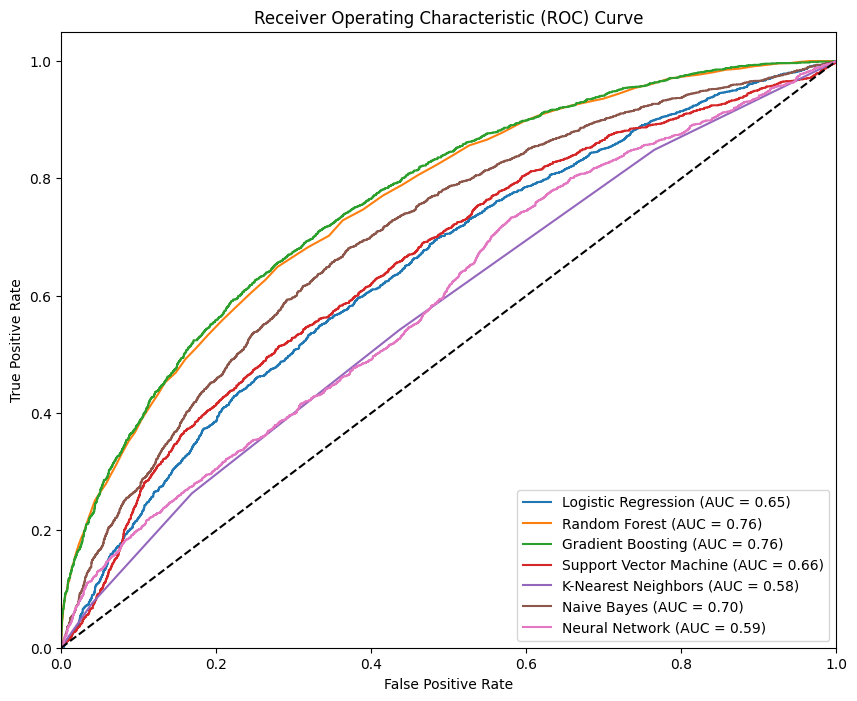